<a href="https://colab.research.google.com/github/akash123456789101112131415/final_year_project/blob/main/price_volume_analysis_reusable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing wrds library

!pip install wrds

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 13.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2


following code is to make all wrds connections




---


NO NEED TO EDIT





In [ ]:
# Making all the process reproducible skip if data locally present




import wrds
import pandas as pd

from datetime import datetime, timedelta
from sqlalchemy.exc import ProgrammingError

import matplotlib.pyplot as plt



# Connect to WRDSy

conn = wrds.Connection( )
conn.create_pgpass_file( )

Enter your WRDS username [root]:apatel53
Enter your password:··········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [ ]:



dd = datetime.strptime('20200228' , '%Y%m%d' )






# Convert back to YYYYMMDD format
dd_str = datetime.strftime(dd, '%Y%m%d')


single_day_df  = get_TAQ_price_table ( dd  = dd_str  , stock = 'GME' , price_type = 'last')



print(single_day_df.head())














dd = datetime.strptime('20210210' , '%Y%m%d' )






# Convert back to YYYYMMDD format
dd_str = datetime.strftime(dd, '%Y%m%d')


single_day_df  = get_TAQ_price_table ( dd  = dd_str  , stock = 'GME' , price_type = 'last')



print(single_day_df.head())



















         date           time_m sym_suffix  price  size tr_scond
0  2020-02-28  09:07:21.997402       None   3.46     3       TI
1  2020-02-28  09:08:24.894826       None   3.46    10       TI
2  2020-02-28  09:08:24.894848       None   3.46     3       TI
3  2020-02-28  09:08:24.900090       None   3.35    10       TI
4  2020-02-28  09:08:24.905176       None   3.34     1       TI
         date           time_m sym_suffix  price  size tr_scond
0  2021-02-10  04:00:16.898761       None  50.25     1       TI
1  2021-02-10  04:00:17.259724       None  50.25     1      FTI
2  2021-02-10  04:00:18.260176       None  50.05     2       TI
3  2021-02-10  04:00:18.695280       None  50.00    20       TI
4  2021-02-10  04:00:19.882279       None  50.00     3       TI


In [ ]:
print(single_day_df.head())

         date           time_m sym_suffix  price  size tr_scond
0  2020-01-28  09:13:26.575838       None   4.37     1       TI
1  2020-01-28  09:13:40.781811       None   4.37    99      FTI
2  2020-01-28  09:13:40.781835       None   4.37     1      FTI
3  2020-01-28  09:13:43.235486       None   4.37    99      FTI
4  2020-01-28  09:13:43.235507       None   4.37     1      FTI


Defining all the functions required for prcoessing and plotting data


---



NO NEED TO EDIT




In [ ]:
#
# functions to retritve data using RODBC

def get_TAQ_price_table(dd = '20241029', stock = 'GME' , price_type = 'last' ):


    # function to get tick price data for given stock for one day


    if price_type == 'last':

        # Construct and execute the query
        query = f"""
        SELECT
            date,  time_m,  sym_suffix,  price,  size,   tr_scond
        FROM taqmsec.ctm_{dd}
        WHERE (ex = 'N' OR ex = 'T' OR ex = 'Q' OR ex = 'A')
        AND sym_root = '{stock}'
        AND price != 0
        AND tr_corr = '00'
        """



        try:
            # Fetch the data into a DataFrame
            df = conn.raw_sql(query)
            return df

        except ProgrammingError as e:
            # Check if the error message contains 'relation does not exist'
            if 'does not exist' in str(e.orig):
                pass
            else:
                print(f"An error occurred: {e}")


    if price_type == 'mid':




        # Construct and execute the query
        query = f"""
        SELECT date, time_m, bid , ask
        FROM taqmsec.cqm_{dd}
        WHERE (ex = 'N' OR ex = 'T' OR ex = 'Q' OR ex = 'A')
        AND sym_root = '{stock}'

        """




        try:
            # Fetch the data into a DataFrame
            df = conn.raw_sql(query)
            return df

        except ProgrammingError as e:
            # Check if the error message contains 'relation does not exist'
            if 'does not exist' in str(e.orig):
                pass
            else:
                print(f"An error occurred: {e}")








def get_multiple_day_data (sd , ed , price_type = 'last' ):



    sd = datetime.strptime(sd , '%Y%m%d' )
    ed = datetime.strptime(ed , '%Y%m%d' )
    dd  = sd






    all_day_df = pd.DataFrame()

    while dd <= ed:

        # Convert back to YYYYMMDD format
        dd_str = datetime.strftime(dd, '%Y%m%d')


        single_day_df  = get_TAQ_price_table ( dd  = dd_str  , stock = 'GME' , price_type = price_type)
        all_day_df = pd.concat([all_day_df, single_day_df], ignore_index=True)


        # Add 7 days
        dd = dd + timedelta(days=1 )


    return all_day_df





#
# The function to convert TAQ trade data of given stock to 30 min data


def tick_to_30_min( df, price_type  ):
    # function that converts data into 30 min data with while correcting time and date format
    # expected date and time format is "YYYY-MM-DD"  and "HH:MM:SS.fffffffff"

    df.columns = df.columns.str.upper()



    if price_type == 'last':


        df['dollar_volume']  = df['SIZE'] * df['PRICE']


        df['DATE'] = pd.to_datetime(df['DATE'] , format  = '%Y-%m-%d')


        df['TIME_M'] = pd.to_datetime(df['TIME_M'], format='%H:%M:%S.%f').dt.strftime('%H:%M:%S')
        df['DATETIME'] = pd.to_datetime(df['DATE'].astype(str) + ' ' + df['TIME_M'])
        df.set_index('DATETIME', inplace=True)





        # Resample to 30-minute intervals and aggregate
        resampled_df = df.resample('30min').agg({
            'PRICE': 'last',  # Get the last price in the interval
            'SIZE': 'sum',     # Sum the volume in the interval
            'TIME_M' : 'last',
            'dollar_volume' : 'sum'
        })



        resampled_df['time'] = resampled_df.index.shift(1, freq='30min').time

        resampled_df.reset_index(inplace=True)


        resampled_df['date'] = resampled_df['DATETIME'].dt.date
        resampled_df.drop(columns=['DATETIME'], inplace=True)




        resampled_df = resampled_df[['date', 'time', 'PRICE', 'SIZE', 'TIME_M' ,'dollar_volume']]





        resampled_df = resampled_df.dropna(how='any')





        # resampled_df['TIME'] = resampled_df.TIME_M.time

        # resampled_df['DATE'] = resampled_df.index.date




        return resampled_df



    if price_type == 'mid':

        df['MID_PRICE'] = (df['ASK'] + df['BID'] )/ 2

        df.drop(['BID', 'ASK'  ], axis=1)



        df['DATE'] = pd.to_datetime(df['DATE'] , format  = '%Y-%m-%d')


        df['TIME_M'] = pd.to_datetime(df['TIME_M'], format='%H:%M:%S.%f').dt.strftime('%H:%M:%S')
        df['DATETIME'] = pd.to_datetime(df['DATE'].astype(str) + ' ' + df['TIME_M'])
        df.set_index('DATETIME', inplace=True)



        # Resample to 30-minute intervals and aggregate
        resampled_df = df.resample('30min').agg({
            'MID_PRICE': 'last',  # Get the last price in the interval
            'TIME_M' : 'last',
        })



        resampled_df['time'] = resampled_df.index.shift(1, freq='30min').time

        resampled_df.reset_index(inplace=True)


        resampled_df['date'] = resampled_df['DATETIME'].dt.date
        resampled_df.drop(columns=['DATETIME'], inplace=True)




        resampled_df = resampled_df[['date', 'time', 'MID_PRICE', 'TIME_M' ]]


        resampled_df = resampled_df.dropna(how='any')





        # resampled_df['TIME'] = resampled_df.TIME_M.time

        # resampled_df['DATE'] = resampled_df.index.date



        return resampled_df






# The following Plots the data when given 30 minute data.



def plot_last_price_plots(df ):
    # function made to make plots of data having price(last) and volume both


    df['date']  = df['date'].astype(str)
    df['time']  = df['time'].astype(str)



    #to get plot of only some specific timeframes

    df = df[df['time'] >= '09:00:00'  ]

    df = df[df['time'] <= '16:30:00'  ]




    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

    # Set the datetime as the index
    df.set_index('datetime', inplace=True)



    def calculate_30min_return(group):
        group = group.sort_index()  # Ensure the group is sorted by time
        group['Return'] = 100 *( group['PRICE'].shift(-1) / group['PRICE'] - 1 )
        group['Return'] = group['Return'].shift(1)
        return group




    # Apply the function to each group (each day)
    df = df.groupby(df.index.date).apply(calculate_30min_return)

    # Reset the index to get 'datetime' back as a column
    df.reset_index(drop=False, inplace=True)




    df =  df[[  'date', 'time', 'PRICE', 'SIZE',
           'TIME_M', 'Return', 'dollar_volume']]




    # =============================================================================
    # average return of half-hour calculation
    # =============================================================================


    # calculate daily average returns for 30 min interval
    average_returns = df.groupby('time')['Return'].mean().reset_index()

    # Rename columns for clarity
    average_returns.columns = ['Time Interval', 'Average Return']






    # calculate total daily volume in  30 min interval
    sum_dollar_volume = df.groupby ('time')['dollar_volume'].sum().reset_index()

    # Rename columns for clarity
    sum_dollar_volume.columns = ['Time Interval' , 'Total Dollar Volume']





    # =============================================================================
    # plotting the results
    # =============================================================================



    # Assuming 'average_returns' is the DataFrame containing your results
    # Ensure the 'Time Interval' column is treated as a string for proper plotting
    average_returns['Time Interval'] = average_returns['Time Interval'].astype(str)

    # Plotting average return

    plt.figure(figsize=(12, 6))
    plt.plot(average_returns['Time Interval'], average_returns['Average Return'], marker='o')

    # Adding labels and title
    plt.xlabel('Time Interval')
    plt.ylabel('Average Return')
    plt.title('Average 30-Minute Return Across All Days')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Adding grid for better visualization
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

    print('\n\n')





    # plotting average dollar volume

    plt.figure(figsize=(12, 6))
    plt.plot(sum_dollar_volume['Time Interval'], sum_dollar_volume['Total Dollar Volume'], marker='o')

    # Adding labels and title
    plt.xlabel('Time Interval')
    plt.ylabel('Total Dollar volume')
    plt.title('sum of  30-Minute volume of all Days')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Adding grid for better visualization
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

    print('\n\n')




def plot_mid_price_plot(df):




    df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
    df.dropna(inplace=True)




    # =============================================================================
    # changing data according to our need
    # =============================================================================


    df['date'] = df['date'].astype(str)
    df['time'] = df['time'].astype(str)



    #to get plot of only some specific timeframes

    df = df[df['time'] >= '09:00:00'  ]

    df = df[df['time'] <= '16:30:00'  ]



    df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

    # Set the datetime as the index
    df.set_index('datetime', inplace=True)



    def calculate_30min_return(group):
        group = group.sort_index()  # Ensure the group is sorted by time
        group['Return'] = 100 *( group['MID_PRICE'].shift(-1) / group['MID_PRICE'] - 1 )
        group['Return'] = group['Return'].shift(1)

        group.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
        group.dropna(inplace=True)
        return group




    # Apply the function to each group (each day)
    df = df.groupby(df.index.date).apply(calculate_30min_return)


    print(df)
    # Reset the index to get 'datetime' back as a column
    df.reset_index(drop=False, inplace=True)




    df =  df[[  'date', 'time', 'MID_PRICE', 'Return',
           'TIME_M', ]]






    # =============================================================================
    # average return of half-hour calculation
    # =============================================================================


    # calculate daily average returns for 30 min interval
    average_returns = df.groupby('time')['Return'].mean().reset_index()

    # Rename columns for clarity
    average_returns.columns = ['Time Interval', 'Average Return']




    # =============================================================================
    # plotting the results
    # =============================================================================



    # if we want to remove the timeframe before and after market times

    #average_returns = average_returns[5: len(average_returns) - 1 ]


    # average_returns = average_returns[9: len(average_returns) -10 ]    # completely removes before and after market data


    # Assuming 'average_returns' is the DataFrame containing your results
    # Ensure the 'Time Interval' column is treated as a string for proper plotting
    average_returns['Time Interval'] = average_returns['Time Interval'].astype(str)

    # Plotting average return

    plt.figure(figsize=(12, 6))
    plt.plot(average_returns['Time Interval'], average_returns['Average Return'], marker='o')

    # Adding labels and title
    plt.xlabel('Time Interval')
    plt.ylabel('Average Return')
    plt.title('Average 30-Minute Return Across All Days')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Adding grid for better visualization
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()









print('Done')










Done


Retriving and reading data for plotting need to be edited by user



---


USER NEED TO EDIT ACCORDING TO USER NEED



In [ ]:

# this is the section that user need to edit in order to retrive different kind of data or need to mention location of the file
# it creates two seperate dataframe based on event dates mentioned by user or can use existing two different files




# mention which type of price data we want to use right now.
# price_type = 'mid'
price_type = 'last'









# if file locally exists
# mention location of the file , need to have two differnt files
file_location_30_min_before_event  = None                              # foldername/filename.csv
file_location_30_min_after_event  = None                               # foldername/filename.csv







# if file does not exists than
# User need to give dates to fetch data using RODBC


# defining start date and end date in YYYYMMDD format for before event data
sd = str(20210121)                                                 # start date
ed = str(20210128)                                                 # end date



if file_location_30_min_before_event != None :


    before_event_df = pd.read_csv(file_location_30_min_before_event)
    #print(before_event_df)
    before_event_30_min_df = tick_to_30_min( before_event_df , price_type= price_type )

else:

    before_event_df   = get_multiple_day_data( sd , ed , price_type)


    # to store the given file into given location
    before_event_df.to_csv('before_event_df.csv')


    #print(before_event_df)
    before_event_30_min_df = tick_to_30_min( before_event_df , price_type= price_type )


    # to store the given file into given location
    before_event_30_min_df.to_csv('before_event_30_min_df.csv')







# defining start date and end date in YYYYMMDD format for after event data
sd = str(20210129)                                                  #start date
ed = str(20210205)                                                  #end date



if file_location_30_min_after_event != None :

    after_event_df = pd.read_csv(file_location_30_min_after_event)
    #print(after_event_df)
    after_event_30_min_df =  tick_to_30_min( after_event_df , price_type = price_type)
else:

    after_event_df   = get_multiple_day_data( sd , ed , price_type)


    # to store the given file into given location
    after_event_df.to_csv('after_event_df.csv')

    #print(after_event_df)
    after_event_30_min_df =  tick_to_30_min( after_event_df , price_type = price_type)



    # to store the given file into given location
    after_event_30_min_df.to_csv('after_event_30_min_df.csv')





print('Done')



ValueError: time data "15:11:28" doesn't match format "%H:%M:%S.%f", at position 368844. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Following is the code to check all the data by printing them

---
Can comment/uncomment according to need


In [ ]:
# if we want to check all the dataframes



# # printing tick data

# print('This is before event tick data')
# print(before_event_df)


# print('This is afetr event tick data')
# print(after_event_df)









# #printing 30 min data

# print('Following is before event 30 min data')
# print(before_event_30_min_df)


# print('Following is before event 30 min data')
# print(after_event_30_min_df)





Followoing is code to plot the data.

---
NO NEED TO EDIT


Following are plots of before event data 




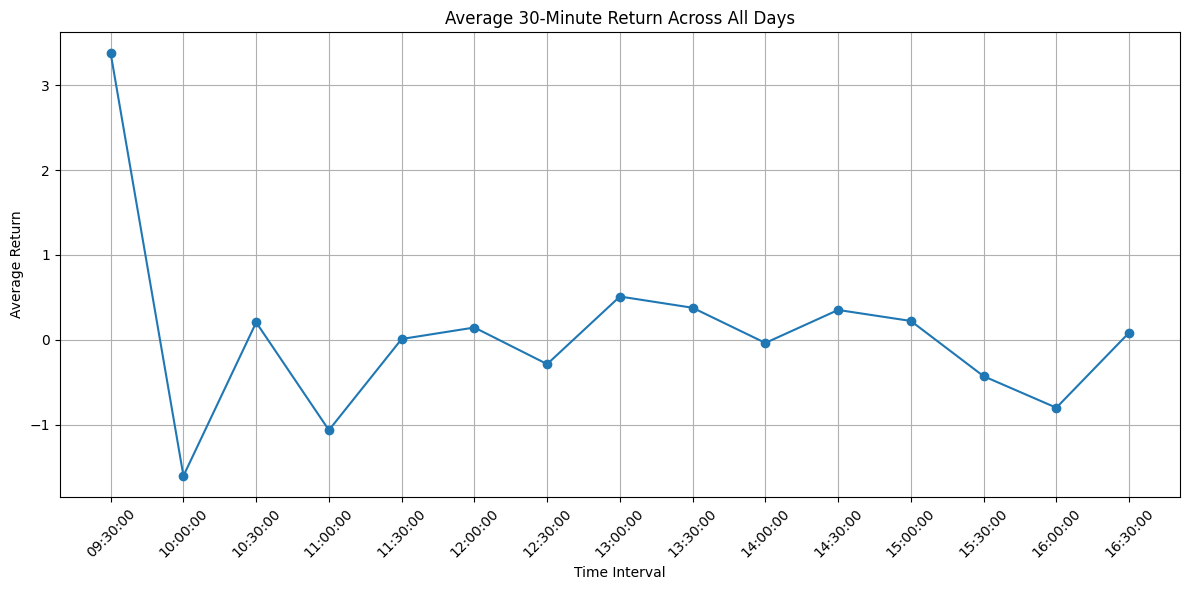

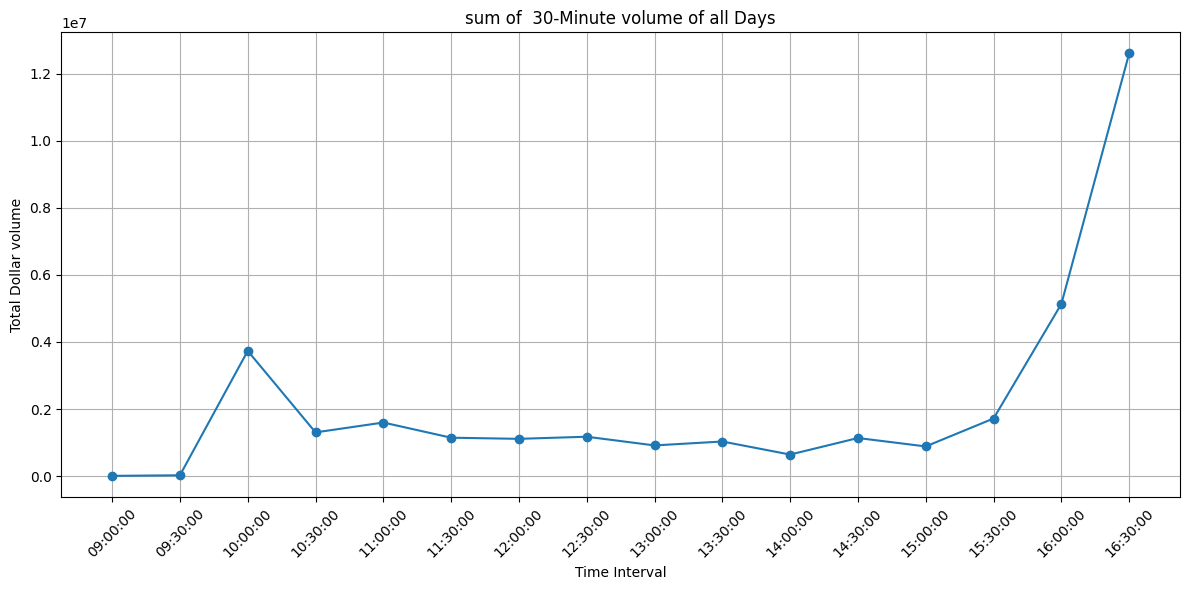




Following are plots of after event data 




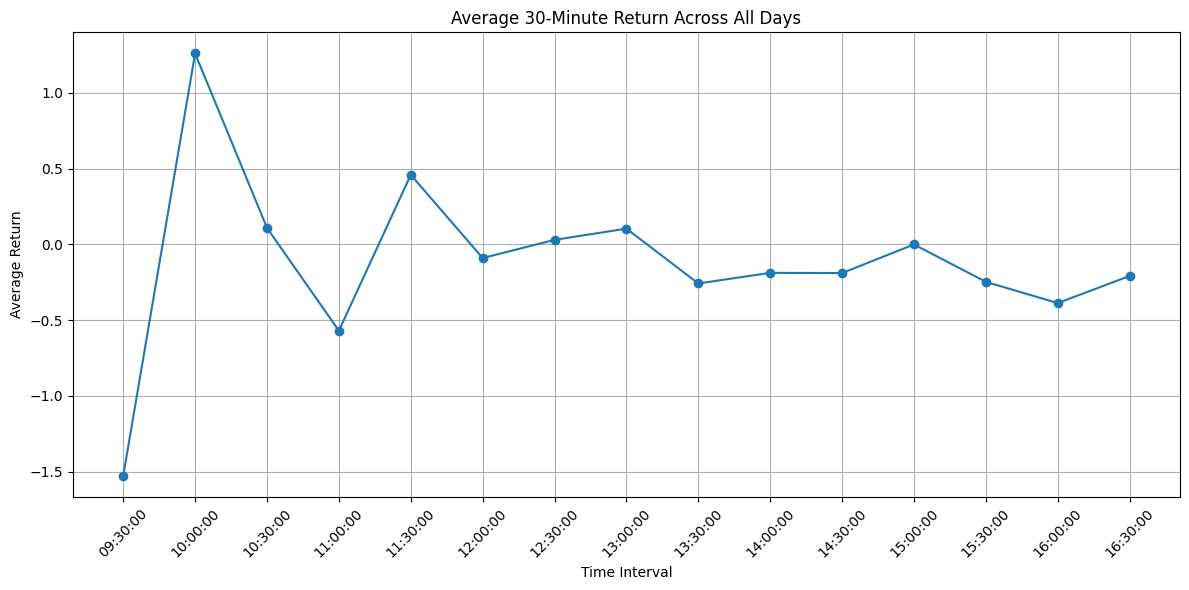

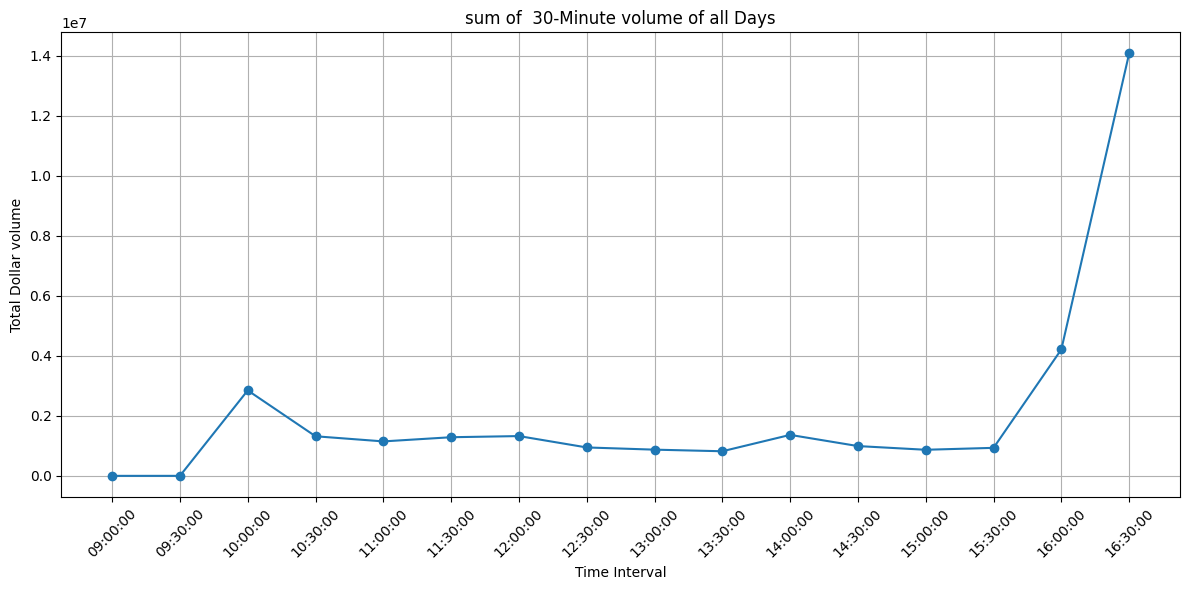

In [ ]:


# this is the final code to print all the modified data

if price_type =='last' :

    print('Following are plots of before event data \n\n')
    plot_last_price_plots(before_event_30_min_df)


    print('Following are plots of after event data \n\n')
    plot_last_price_plots(after_event_30_min_df)

elif price_type == 'mid':

    print('Following are plots of before event data  \n\n ')
    plot_mid_price_plot(before_event_30_min_df)
    print('Following are plots of after event data  \n\n ')
    plot_mid_price_plot(after_event_30_min_df)

In [ ]:

# Close the WRDS connection
conn.close()
